**Group Name: The_Last_Of_Us.ipynb** 

The question we wanted to explore was what neighborhood in Pittsburgh had the best odds of surviving the Last of Us Cordyceps Virus.

In order to do this we used 3 submetrics: Air Quality, Ashmta Rates, Depression Rates.

#### Submetric 1 - Air Quality (Titus Kurian): ####

The reason I chose this specific one was because the virus in the Last of Us is a fungal virus which spread through spores in the air. So, I felt air quality was an important statistic for this.

<Axes: xlabel='site'>

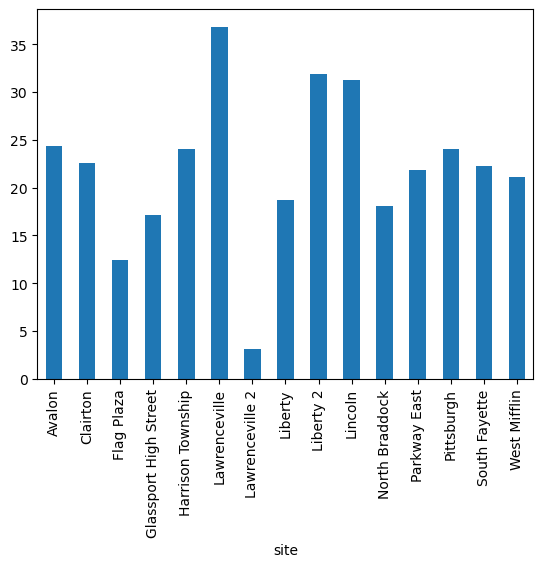

In [8]:
import pandas as pd
%matplotlib inline
data = pd.read_csv("airquality.csv", index_col="date", parse_dates=True)

#Looking at the csv we can see that the important columns are site, date, and index_value which is positively correlated with how bad the airquality in a given neighborhood is.
#Heatlh_advisory and health_effects are descriptive columns that are hard to show so they will be removed. Parameter will also be removed for simplicity sake as each code means a different thing.

data2 = data.drop(['parameter', 'health_advisory', 'health_effects', 'description'], axis = 1)

#To avoid any mixups with graphing later on, I'm storing the pivot table in a new value
data3 = data2.pivot_table(index = 'date', columns = 'site', values = 'index_value')

#This table still contains a lot of NaN values so now we need to find a way to replace all of them without it impacting the data set.
#If we replace all of the NaN values with 0, it will schew the data based on which neighborhoods have more NaNs in the data. 
data3 = data3.fillna(23)
#Now that the NaN values have been dealt with we can start to analyze this data and see the trends we will find


data3.mean().plot(kind='bar')

The conclusion based on the data was that Lawrenceville 2 (Upper Lawrenceville) was the best neighborhood in terms of AQI (Air Quality Index)

#### Submetric 2 - Depression Rates (ShaoQing Cai): ####

While this metric isn't directly related to how a neighborhood would respond to a fungal virus. Mental health outcomes is definitely correlated with how people would react in a Zombie Apocalypse.

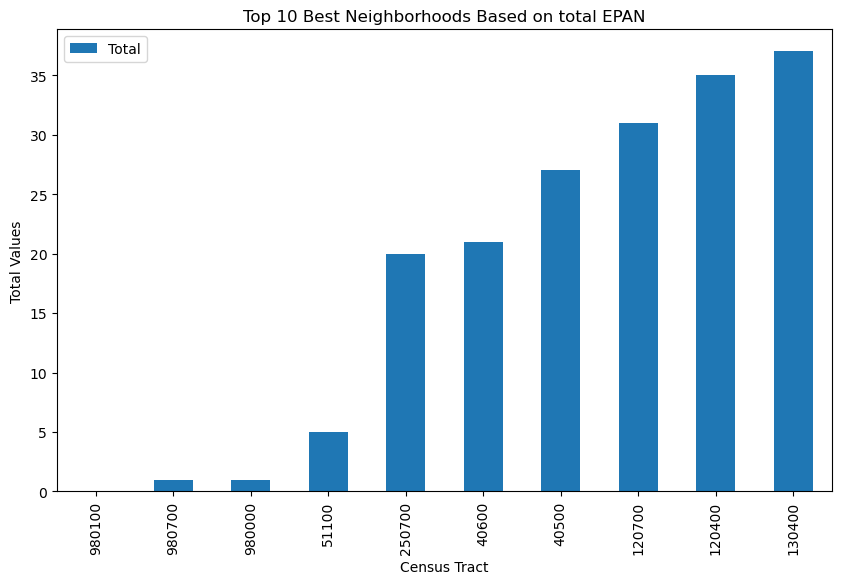

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "depression_all_2016.csv"
df = pd.read_csv(filename)

# Exclude the first row (row with index 0) by slicing the DataFrame
df = df.iloc[1:]

# Add a new column for the total sum of EPAN values.
df['Total'] = df[['EPAN']].sum(axis=1)

# Sort the DataFrame by the Total column in ascending order
sorted_df = df.sort_values(by='Total')

# Select the top 10 best neighborhoods
top_10_best = sorted_df.head(10)

# Create a bar graph of the Total column for the top 10 best neighborhoods
ax = top_10_best.plot.bar(x='CT', y='Total', figsize=(10, 6))

# Set the y-axis label, x-axis label, and title
ax.set_ylabel("Total Values")
ax.set_xlabel("Census Tract")
ax.set_title("Top 10 Best Neighborhoods Based on total EPAN")

plt.show()

By looking up 980100 among the Census Tract data, we found that it was correlated roughly to the neighborhood of East Liberty just called (Liberty in the first submetric data set)

#### Submetric 3 - COVID-19 Infection Rates (Rylee Boles): ####
    
This one was chosen as a submetric because it highlighted how a given neighborhood was influenced by a pandemic. This highlights other factors such as population density which would also be relevant in a zombie apocalypse.

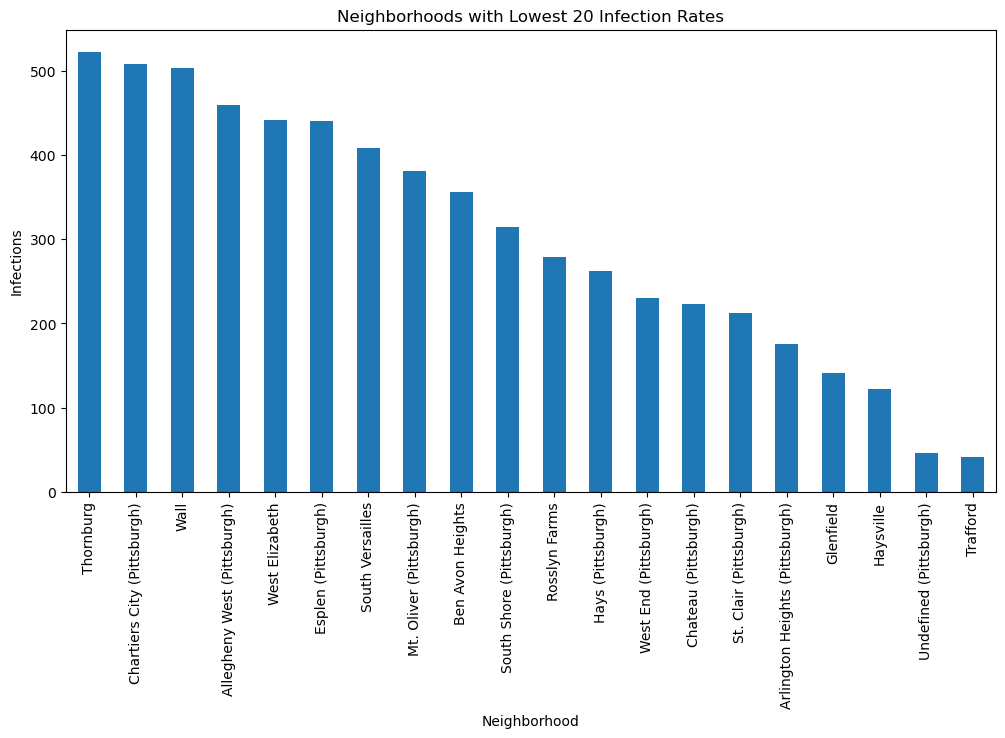

In [2]:
#Setting up the data for each part of this
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'covid-19.csv'  
df  = pd.read_csv(csv_file_path)

#Slicing and pivoting the data so that it fits the set
df = df[['neighborhood_municipality', 'infections']]
pivot_df = df.pivot(columns='neighborhood_municipality', values='infections')

# Sort the data by highest to lowest deaths
sorted_df = pivot_df.sum().sort_values(ascending=False)

# Select the lowest 20 neighborhoods
lowest_20 = sorted_df.tail(20)

# Plot the data as a bar graph
lowest_20.plot(kind='bar', figsize=(12, 6), xlabel='Neighborhood', ylabel='Infections', title='Neighborhoods with Lowest 20 Infection Rates')
plt.xticks(rotation=90)
plt.show()


The lowest four neighborhhods are not technically within Pittsburgh. So this leaves Arlington Heights as the last neighborhood. Using the neighborhoods provided by the first data set, this neighborhood is closest in proximity to Pittsburgh from the first data set.

#### Final Analysis: ####

Using all of these together we can create a stacked bar graph using all of the data previously.

In [12]:
data3.mean()

site
Avalon                   24.365812
Clairton                 22.542028
Flag Plaza               12.392198
Glassport High Street    17.104033
Harrison Township        24.076329
Lawrenceville            36.823973
Lawrenceville 2           3.156427
Liberty                  18.716547
Liberty 2                31.929702
Lincoln                  31.255937
North Braddock           18.095270
Parkway East             21.846337
Pittsburgh               24.045357
South Fayette            22.220505
West Mifflin             21.109310
dtype: float64

In [6]:
top_10_best.head(10)

,CT,EPAD,EPAN,EWAD,EWAN,EMAD,EMAN,Total
389,980100,7,0,6,0,1,0,0
390,980700,9,1,5,1,4,0,1
388,980000,4,1,3,1,1,0,1
289,51100,50,5,34,4,16,1,5
58,250700,202,20,111,14,91,6,20
94,40600,197,21,91,12,106,9,21
92,40500,215,27,121,17,94,10,27
14,120700,256,31,165,23,91,8,31
13,120400,277,35,163,26,114,9,35
19,130400,348,37,197,25,151,12,37


In [3]:
lowest_20.head(20)

neighborhood_municipality
Thornburg                         523.0
Chartiers City (Pittsburgh)       508.0
Wall                              504.0
Allegheny West (Pittsburgh)       460.0
West Elizabeth                    442.0
Esplen (Pittsburgh)               441.0
South Versailles                  409.0
Mt. Oliver (Pittsburgh)           381.0
Ben Avon Heights                  356.0
South Shore (Pittsburgh)          315.0
Rosslyn Farms                     279.0
Hays (Pittsburgh)                 262.0
West End (Pittsburgh)             230.0
Chateau (Pittsburgh)              223.0
St. Clair (Pittsburgh)            213.0
Arlington Heights (Pittsburgh)    175.0
Glenfield                         141.0
Haysville                         122.0
Undefined (Pittsburgh)             46.0
Trafford                           41.0
dtype: float64

Doing some more research:

We will use the neighorhoods that won each of their respective submetric to come up with the overall metric.

**Pittsburgh:**

Subset 1: 24.04537 mean AQI

Subset 2: 21 EPAN Cases*

Subset 3: 1750 infections*

**Liberty:**

Subset 1: 18.176 mean AQI

Subset 2: 4 EPAN Cases

Subset 3: 3248 infections*


**Lawrenceville 2 (Upper Lawrenceville):**

Subset 1: 3.158 mean AQI

Subset 2: 146 EPAN Cases*

Subset 3: 3229 Infections*

'*' - *This data was found by doing a Ctrl-F search of the Relevant CSV files as well as looking up census tracts for the given area*

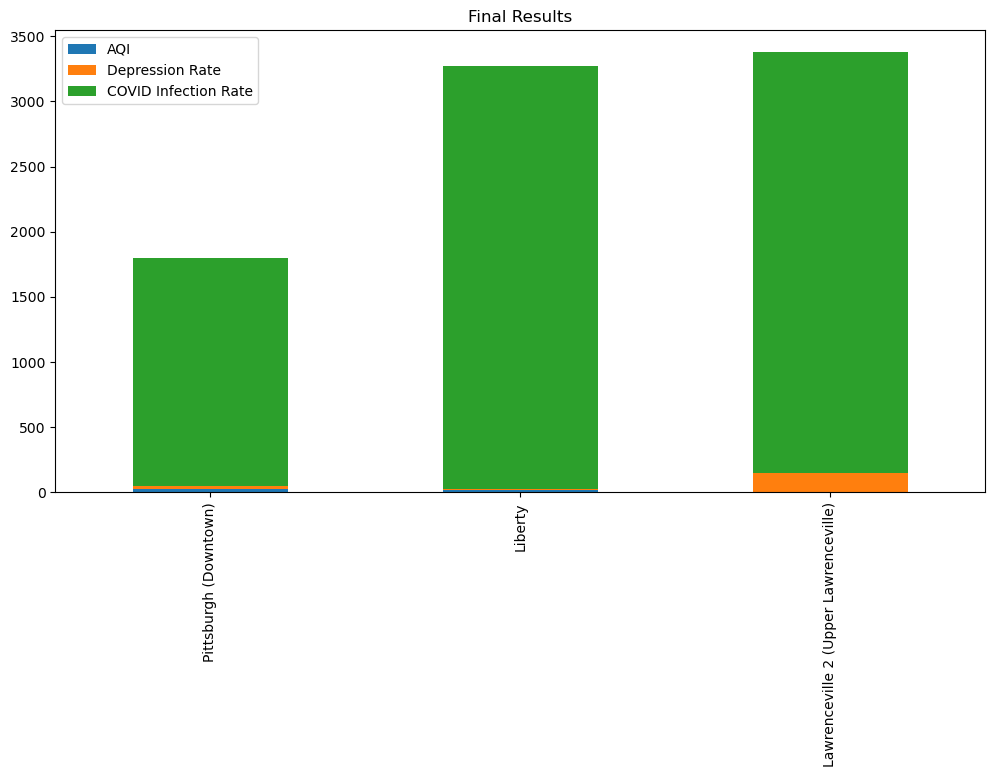

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#Using the numbers we collected above to make a dataframe
data = {'Pittsburgh (Downtown)': [24.045, 21, 1750],
        'Liberty': [18.176, 4, 3248],
        'Lawrenceville 2 (Upper Lawrenceville)': [3.158, 146, 3229]}
df = pd.DataFrame(data, index=['AQI', 'Depression Rate', 'COVID Infection Rate'])
#We rotate the data around so we can use the neighborhoods as label
df_transposed = df.T

# Plotting the given data
df_transposed.plot(kind='bar', stacked=True, figsize=(12, 6), title='Final Results')
plt.show()

#### Conclusion: ####

Based off the three submetrics, we can conclude that Downtown Pittsburgh is the best neighborhood based on the overall metric combining AQI, EPAN Cases, and COVID-19 Infections. 

However, we need to be aware of the various edgecases that are associated with doing this kind of data analysis:

* Downtown Pittsburgh is mainly a business district, so housing prices price out most people from living in that specific neighborhood. This probably contributes to reducing all 3 of the submetrics. 

* There is a level of imprecision that comes from how neighborhoods are labelled on these datasets. Census Tract numbers occasionally change and people label neighborhoods differently depending on. It is very possible that some of this data doesn't perfectly line up with the actual boundaries of the neighborhoods.

Overall while based on the data, you can conclude Downtown is the safest neighborhood based on these criterias. If it were to happen you not want to be anywhere near Pittsburgh.

